[GitHub](https://github.com/zalandoresearch/fashion-mnist)

# 資料載入

In [1]:
import mnist_reader

x_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
x_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')

In [2]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [3]:
# 取第一筆
import pandas as pd

pd.DataFrame(x_train[0])

,0
0,0
1,0
2,0
3,0
4,0
...,...
779,0
780,0
781,0
782,0


這個是: 9


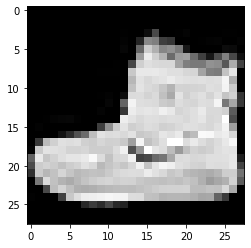

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

print("這個是:", y_train[0])
plt.imshow(x_train[0].reshape(28, 28), cmap="gray")

# 模型建立

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU

model = Sequential()
# 64 * 784 + 64 = 50240
model.add(Dense(256, activation="relu", input_dim=784))

# 64 * 10 + 10(bias)
model.add(Dense(10, activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


# 模型編譯

In [7]:
from tensorflow.keras.losses import CategoricalCrossentropy

model.compile(loss=CategoricalCrossentropy(),
              optimizer="Adagrad",
              metrics=["accuracy"])

# 資料預處理 One-Hot encoding

In [8]:
from tensorflow.keras.utils import to_categorical

y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

print("原本:", y_train[2])
print("處理過:", y_train_cat[2])

原本: 0
處理過: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


# 正規化
    -1: 自動計算(一個位置)
    圖片: 1D -> /255(normalize)

In [9]:
x_train_norm = x_train / 255
x_test_norm = x_test / 255

# 模型訓練
    batch_size       : 看多少筆資料做一次梯度下降(圖片不大: 100-200, 圖片大: 10-20)
    validation_split : 切出一部分作為驗證資料
    epochs           : 整份資料集看多少遍。一個 epoch 做了 54000 / 200 = 270 次梯度下降
    verbose(選用)    :  0 (Quiet), 1 (Noisy), 2 (Normal)

In [17]:
history = model.fit(x_train_norm,
                    y_train_cat,
                    batch_size=1024,
                    validation_split=0.1, 
                    epochs=500,
                    verbose=2)

Epoch 1/500
135/135 - 1s - loss: 0.2876 - accuracy: 0.8996 - val_loss: 0.3303 - val_accuracy: 0.8808
Epoch 2/500
135/135 - 1s - loss: 0.2875 - accuracy: 0.8996 - val_loss: 0.3302 - val_accuracy: 0.8808
Epoch 3/500
135/135 - 1s - loss: 0.2875 - accuracy: 0.8996 - val_loss: 0.3302 - val_accuracy: 0.8813
Epoch 4/500
135/135 - 1s - loss: 0.2874 - accuracy: 0.8997 - val_loss: 0.3303 - val_accuracy: 0.8810
Epoch 5/500
135/135 - 1s - loss: 0.2874 - accuracy: 0.8996 - val_loss: 0.3304 - val_accuracy: 0.8810
Epoch 6/500
135/135 - 1s - loss: 0.2874 - accuracy: 0.8996 - val_loss: 0.3302 - val_accuracy: 0.8808
Epoch 7/500
135/135 - 1s - loss: 0.2873 - accuracy: 0.8996 - val_loss: 0.3303 - val_accuracy: 0.8807
Epoch 8/500
135/135 - 1s - loss: 0.2873 - accuracy: 0.8996 - val_loss: 0.3302 - val_accuracy: 0.8810
Epoch 9/500
135/135 - 1s - loss: 0.2873 - accuracy: 0.8997 - val_loss: 0.3301 - val_accuracy: 0.8815
Epoch 10/500
135/135 - 1s - loss: 0.2872 - accuracy: 0.8997 - val_loss: 0.3301 - val_accura

KeyboardInterrupt: 

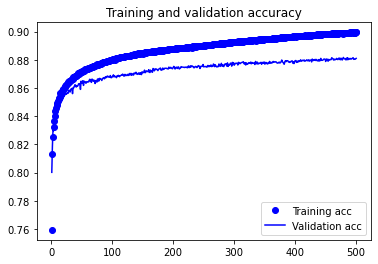

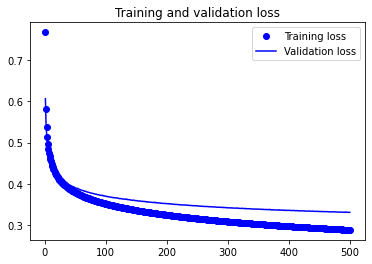

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1,len(acc)+1)

plt.plot(epochs,acc,'bo',label = 'Training acc')
plt.plot(epochs,val_acc,'b',label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()#显示标签

plt.figure()

plt.plot(epochs,loss,'bo',label = 'Training loss')
plt.plot(epochs,val_loss,'b',label = 'Validation loss')
plt.title("Training and validation loss")
plt.legend()

plt.show()

# 模型評估
    只要還在 tf 裡, 請帶入 one-hot encoding (模型框架性質關係)

In [12]:
model.evaluate(x_test_norm, y_test_cat, verbose=2)

313/313 - 1s - loss: 0.3559 - accuracy: 0.8740


[0.35588932037353516, 0.8740000128746033]

# 模型預測分類

In [13]:
pre = model.predict_classes(x_test_norm)
pre

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

# 視覺化 - 混淆矩陣
    不是在 tf 裡, 帶入原本的 y

In [14]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, pre)

c = ["{}(預測)".format(i) for i in range(10)]
i = ["{}(真實)".format(i) for i in range(10)]

pd.DataFrame(mat, columns=c, index=i)

,0(預測),1(預測),2(預測),3(預測),4(預測),5(預測),6(預測),7(預測),8(預測),9(預測)
0(真實),825,1,12,39,5,2,104,0,12,0
1(真實),4,965,1,22,3,0,4,0,1,0
2(真實),14,1,802,15,95,1,69,0,3,0
3(真實),16,9,16,892,32,0,29,0,6,0
4(真實),0,0,107,33,790,0,64,0,6,0
5(真實),0,0,0,1,0,950,0,35,2,12
6(真實),131,2,94,32,72,0,653,0,16,0
7(真實),0,0,0,0,0,27,0,946,0,27
8(真實),3,1,7,7,5,2,5,5,965,0
9(真實),0,0,0,0,0,8,1,39,0,952


# 觀察 正確與錯誤答案
    nonzero: 取出是 True 的 index
    
    Label	Description
    0		T-shirt/top
    1		Trouser
    2		Pullover
    3		Dress
    4		Coat
    5		Sandal
    6		Shirt
    7		Sneaker
    8		Bag
    9		Ankle boot

In [15]:
item_dict = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

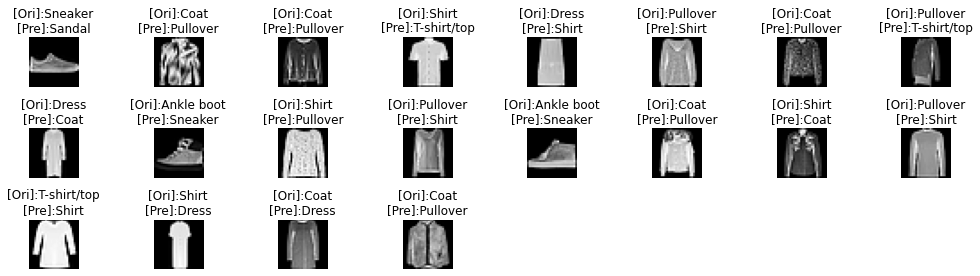

In [16]:
import numpy as np

# (x座標, y座標, z座標)
idx = np.nonzero(pre != y_test)[0]

# 預測錯誤的圖
false_img = x_test[idx]
false_answer = y_test[idx]
false_predict = pre[idx]

# 把圖變大一點才塞的下
plt.figure(figsize=(14, 200))
width = 8
height = len(false_img) // width + 1
for i, img in enumerate(false_img[: 20]):
    plt.subplot(height, width, i+1)
    plt.axis("off")
    plt.tight_layout()

    t = f"[Ori]:{item_dict[false_answer[i]]}\n[Pre]:{item_dict[false_predict[i]]}"
    plt.title(t)
    
    plt.imshow(img.reshape(28, 28), cmap="gray")